<a id='intro'></a>
## Introduction

In this project. I have chosen TMDb movie dataset to gain some insights from it about the movie making industry.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


### What questions to answer from TMDB Movies Dataset
1. What is the highest vote average movie genre in each year?
2. What is the relationship between the budget of a movie and the revenue?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Inspecting the available data 
df = pd.read_csv('tmdb-movies.csv')
df.head(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


### Info got from previous data shown:
* There are some fields that don't matter to me in the questions that I am going to search for. 

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Info got from previous data shown:
* The average runtime of a movie is about 1.7 hours
* The minimum and maximum year of release is 1960 and 2015 respectively

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Info got from previous data shown:
* There are a lot of missing values in the homepage field
* All the fields that have numerical data have complete values

In [6]:
# removing the columns that don't matter to my questions and analysis
# kept some columns that I don't need because I might add more questions to answer later
df.drop([
    'id', 'original_title', 'cast', 'homepage', 'tagline',
    'keywords', 'overview', 'release_date'
    ], axis=1, inplace=True)

In [7]:
df.head()

,imdb_id,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [9]:
# removing the rows that contain a null value in the genres column
# because I need the genres for the first question later
df.dropna(subset=['genres'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10843 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10835 non-null  object 
 1   popularity            10843 non-null  float64
 2   budget                10843 non-null  int64  
 3   revenue               10843 non-null  int64  
 4   director              10801 non-null  object 
 5   runtime               10843 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9827 non-null   object 
 8   vote_count            10843 non-null  int64  
 9   vote_average          10843 non-null  float64
 10  release_year          10843 non-null  int64  
 11  budget_adj            10843 non-null  float64
 12  revenue_adj           10843 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [11]:
def get_dummy_columns(dataframe, column_name, separator='|'):
    '''
        A function that generates the dummy columns
        from a column that contains a sting
    '''
    column = dataframe[column_name]
    dummy_columns = column.str.get_dummies(separator)
    return dummy_columns

In [12]:
# making each genre as a separate column
genre_columns = get_dummy_columns(df, 'genres')

# taking the list of genres for future analysis
genres_list  = genre_columns.columns.to_list()
print(genres_list)

# concatinating both of the DataFrames
new_df = pd.concat([df, genre_columns], axis=1)

# dropping the genres as it is not needed anymore
new_df.drop(['genres'], axis=1, inplace=True)

new_df.head()

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


,imdb_id,popularity,budget,revenue,director,runtime,production_companies,vote_count,vote_average,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,tt0369610,32.985763,150000000,1513528810,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,...,0,0,0,0,0,1,0,1,0,0
1,tt1392190,28.419936,150000000,378436354,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,...,0,0,0,0,0,1,0,1,0,0
2,tt2908446,13.112507,110000000,295238201,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,...,0,0,0,0,0,1,0,1,0,0
3,tt2488496,11.173104,200000000,2068178225,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,...,0,0,0,0,0,1,0,0,0,0
4,tt2820852,9.335014,190000000,1506249360,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,...,0,0,0,0,0,0,0,1,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the highest vote average movie genre in each year?)

In [13]:
# creating a list to store any series got as a n avarage of vote per a genre in each year
pandas_serieses = []

# performing the average vote per genre in each year
for genre in genre_columns:
    # taking the sum of votes in a year for a genre
    release_year_group  = new_df[new_df[genre] > 0].groupby('release_year').sum()
    # getting the average per each movie in that year
    avg_war_vote = release_year_group['vote_count'] // release_year_group[genre]
    # adding the series to the list to concat later
    pandas_serieses.append(avg_war_vote)


In [14]:

# concatinating the list of serieses
combined_df = pd.concat(pandas_serieses, axis=1)
# setting column names 
combined_df.columns = genres_list

combined_df.head()


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,65,82,NaN,44,25,NaN,138,28,56.0,12.0,58.0,190,39.0,NaN,64,46,NaN,235.0,13.0,50.0
1961,30,180,913.0,162,105,NaN,75,202,13.0,17.0,36.0,26,103.0,18.0,94,14,NaN,NaN,59.0,19.0
1962,100,170,NaN,15,118,NaN,71,13,12.0,12.0,174.0,16,15.0,32.0,49,12,NaN,108.0,220.0,61.0
1963,140,158,486.0,42,46,NaN,55,194,39.0,52.0,127.0,66,NaN,49.0,48,22,NaN,128.0,409.0,23.0
1964,145,136,53.0,109,23,NaN,70,226,164.0,19.0,35.0,18,182.0,32.0,35,20,NaN,90.0,300.0,14.0


In [15]:
# getting the max values for an average in each row
max_genre_value_per_year = combined_df.apply(
    lambda row: (row.idxmax(), row.max()),
    axis=1,
)

# generating a new DataFraem consisting from the max_genre, max_value
result_df = pd.DataFrame(
    max_genre_value_per_year.tolist(),
    columns=['max_genre', 'max_value'],
    index=combined_df.index,
    )

result_df.head()

,max_genre,max_value
release_year,,
1960,Thriller,235.0
1961,Animation,913.0
1962,War,220.0
1963,Animation,486.0
1964,War,300.0


[Text(0, 0, 'Thriller'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'War'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 

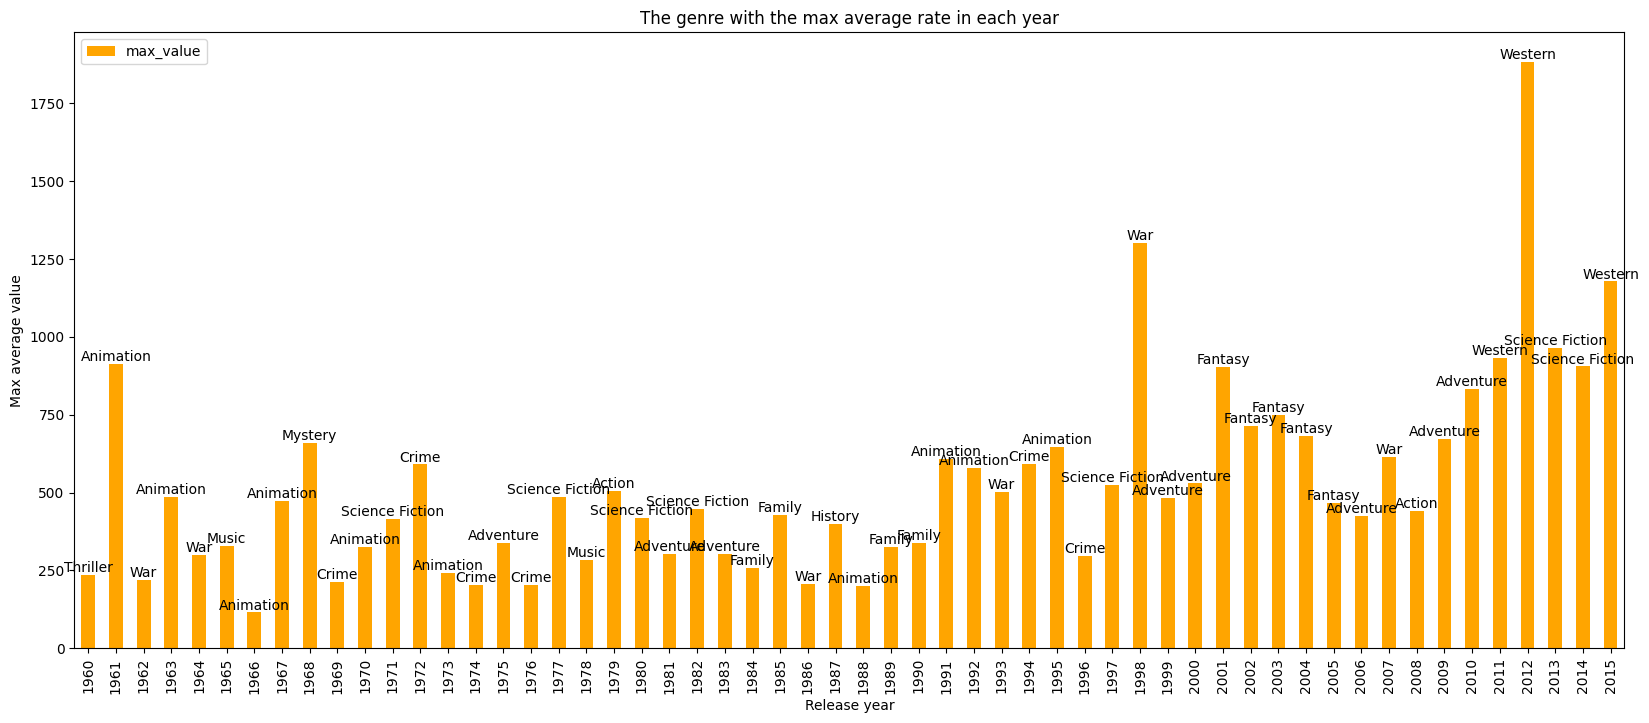

In [16]:
# plotting the result dataframe
the_plot = result_df.plot(
    kind='bar',
    figsize=(20, 8), 
    color='orange', 
    xlabel= 'Release year',
    ylabel='Max average value',
    title='The genre with the max average rate in each year'
    )
the_plot.bar_label(container=the_plot.containers[0],labels=result_df['max_genre'], label_type='edge')

### Research Question 2  (What is the relationship between the budget of a movie and the revenue?)

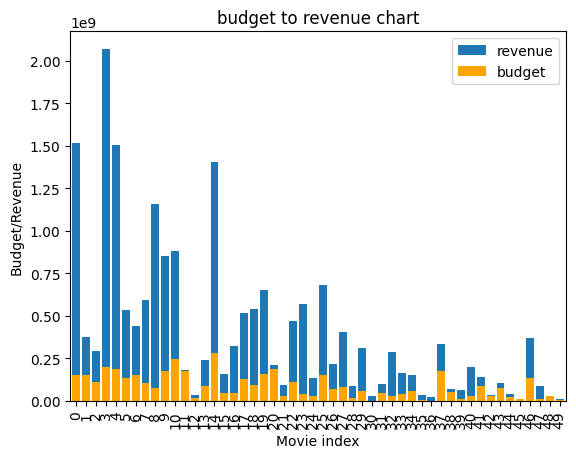

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
new_df['revenue'].head(50).plot(kind='bar', label='revenue', width=0.8, align='center')
new_df['budget'].head(50).plot(kind='bar', label='budget', color='orange', width=0.8, align='center')


plt.title('budget to revenue chart')
plt.xlabel('Movie index')
plt.ylabel('Budget/Revenue')
plt.legend()

<a id='conclusions'></a>
## Conclusions

### Question 1 Conclusions 
* The Animation genre was highly rated from 1960 to 1970
* The science fiction genre was having high vote rates from 1971 to 1982
* The war genre got very popular in 1998 and after it that vote rates started to rise up in values
* The Western genre was having the top rate average with more that 1750 vote average in 2012


### Question 2 Conclusions 
* Most of movies are making revenues more that their budget 
* The budget of the movies chosen didn't exceed 0.25 * 1e9 
* Few Movies didn't make profit, where their budget was higher than their revenue 


# References
1. [https://matplotlib.org/](https://matplotlib.org/)
2. [https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart](https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart)
3. [https://stackoverflow.com/questions/40575067/how-to-increase-the-space-between-bar-plot-bars](https://stackoverflow.com/questions/40575067/how-to-increase-the-space-between-bar-plot-bars)
4. [https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/](https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/)